In [18]:
import os
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import os

def carregar_dados(path, nome_arq):
    lista_documentos = []
    titulos = []
    with open(os.path.join(path, nome_arq), "r", encoding='utf-8') as fin:
        for line in fin.readlines():
            text = line.strip()
            if text:  # ignora linhas vazias
                lista_documentos.append(text)
                titulos.append(text[0:min(len(text), 100)])
    return lista_documentos, titulos



In [20]:
def processar_dados(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    stopword_ing = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    
    texts = []
    for i in doc_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if i not in stopword_ing]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    
    return texts


In [21]:
def preparar_corpus(documento_preparado):
    dictionary = corpora.Dictionary(documento_preparado)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in documento_preparado]
    return dictionary, doc_term_matrix
    

In [15]:
def cria_modelo_LSA(documento_preparado, qtd_topicos, words):
    dictionary, doc_term_matrix = preparar_corpus(documento_preparado)
    lsa_model = LsiModel(doc_term_matrix, num_topics=qtd_topicos, id2word=dictionary)
    topicos = lsa_model.print_topics(num_topics=qtd_topicos, num_words=words)
    print(topicos)
    return lsa_model, topicos

In [22]:
def calculo_coerencia(dictionary, doc_term_matrix, documento_preparado, stop, start=2, step=3):
    valores_coerencia = []
    lista_modelos = []

    for qtd_topicos in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=qtd_topicos, id2word=dictionary)
        lista_modelos.append(model)
        coherence_model = CoherenceModel(model=model, texts=documento_preparado, dictionary=dictionary, coherence='c_v')
        valor = coherence_model.get_coherence()
        valores_coerencia.append(valor)
    
    return lista_modelos, valores_coerencia

In [23]:
def gerar_grafico_coerencia(documento_preparado, start, stop, step):
    dictionary, doc_term_matrix = preparar_corpus(documento_preparado)
    model_list, valor_coerencia = calculo_coerencia(dictionary, doc_term_matrix, documento_preparado, stop, start, step)

    x = range(start, stop, step)
    plt.plot(x, valor_coerencia, marker='o')
    plt.xlabel("Número de tópicos")
    plt.ylabel("Score de coerência")
    plt.title("Coerência vs. Número de tópicos (LSA)")
    plt.legend(["Score de coerência"], loc='best')
    plt.grid(True)
    plt.show()


[(0, '-0.395*"point" + -0.269*"first" + -0.250*"final" + -0.212*"quarter" + -0.203*"nba" + -0.200*"buck" + -0.188*"sun" + -0.172*"antetokounmpo" + -0.156*"player" + -0.134*"said"'), (1, '-0.363*"vaccin" + -0.328*"mask" + -0.289*"school" + -0.171*"student" + -0.169*"19" + -0.160*"guidanc" + -0.157*"covid" + -0.150*"univers" + -0.149*"effect" + -0.144*"recommend"'), (2, '0.313*"everi" + -0.299*"point" + 0.279*"day" + 0.270*"embrac" + 0.270*"champion" + 0.239*"final" + -0.224*"quarter" + 0.182*"made" + 0.177*"get" + 0.152*"play"'), (3, '-0.553*"fire" + -0.264*"deploy" + -0.202*"said" + -0.195*"oregon" + -0.184*"mobil" + -0.140*"tuesday" + -0.136*"time" + -0.135*"season" + -0.119*"mani" + -0.107*"acr"')]


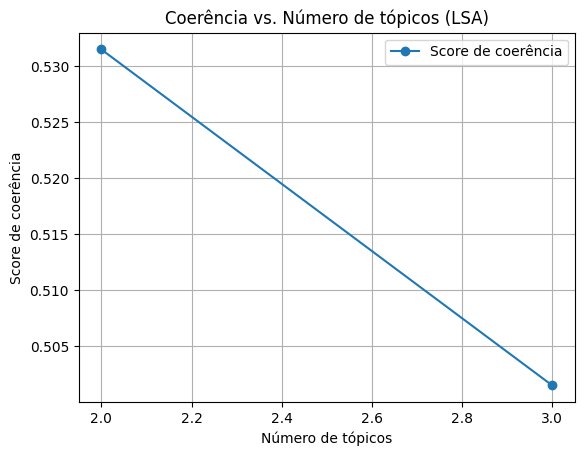

In [24]:
# Execução principal
qtdd_topicos = 4
words = 10
start, stop, step = 2, 4, 1

lista_documentos, titulos = carregar_dados("", "noticias.txt")
documento_preparado = processar_dados(lista_documentos)
modelo, topicos = cria_modelo_LSA(documento_preparado, qtdd_topicos, words)
gerar_grafico_coerencia(documento_preparado, start, stop, step)